### 주제: 문장 유형 분류 AI 경진대회 - 전체 타겟
---
- 출처: https://dacon.io/competitions/official/236037/overview/description

In [1]:
# 모듈 로딩
import pandas as pd
import platform
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, Dropout, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow import random # random seed 설정용

[1] 데이터 준비

In [2]:
# 데이터 로딩
df = pd.read_csv('./open/train.csv').iloc[:,1:]
df

,문장,유형,극성,시제,확실성,label
0,0.75%포인트 금리 인상은 1994년 이후 28년 만에 처음이다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실
1,이어 ＂앞으로 전문가들과 함께 4주 단위로 상황을 재평가할 예정＂이라며 ＂그 이전이...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
2,정부가 고유가 대응을 위해 7월부터 연말까지 유류세 인하 폭을 30%에서 37%까지...,사실형,긍정,미래,확실,사실형-긍정-미래-확실
3,"서울시는 올해 3월 즉시 견인 유예시간 60분을 제공하겠다고 밝혔지만, 하루 만에 ...",사실형,긍정,과거,확실,사실형-긍정-과거-확실
4,익사한 자는 사다리에 태워 거꾸로 놓고 소금으로 코를 막아 가득 채운다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실
...,...,...,...,...,...,...
16536,"＇신동덤＇은 ＇신비한 동물사전＇과 ＇해리 포터＇ 시리즈를 잇는 마법 어드벤처물로, ...",사실형,긍정,과거,확실,사실형-긍정-과거-확실
16537,"수족냉증은 어릴 때부터 심했으며 관절은 어디 한 곳이 아니고 목, 어깨, 팔꿈치, ...",사실형,긍정,과거,확실,사실형-긍정-과거-확실
16538,김금희 소설가는 ＂계약서 조정이 그리 어려운가 작가를 격려한다면서 그런 문구 하나 ...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
16539,1만명이 넘는 방문자수를 기록한 이번 전시회는 총 77개 작품을 넥슨 사옥을 그대로...,사실형,긍정,과거,불확실,사실형-긍정-과거-불확실


In [3]:
# 결측치 체크
df.isnull().sum()

문장       0
유형       0
극성       0
시제       0
확실성      0
label    0
dtype: int64

In [4]:
# 중복 데이터 체크
df.duplicated().sum()

31

In [5]:
# 중복 데이터 삭제
df = df.drop_duplicates(keep='last')

In [6]:
df

,문장,유형,극성,시제,확실성,label
0,0.75%포인트 금리 인상은 1994년 이후 28년 만에 처음이다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실
1,이어 ＂앞으로 전문가들과 함께 4주 단위로 상황을 재평가할 예정＂이라며 ＂그 이전이...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
2,정부가 고유가 대응을 위해 7월부터 연말까지 유류세 인하 폭을 30%에서 37%까지...,사실형,긍정,미래,확실,사실형-긍정-미래-확실
3,"서울시는 올해 3월 즉시 견인 유예시간 60분을 제공하겠다고 밝혔지만, 하루 만에 ...",사실형,긍정,과거,확실,사실형-긍정-과거-확실
4,익사한 자는 사다리에 태워 거꾸로 놓고 소금으로 코를 막아 가득 채운다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실
...,...,...,...,...,...,...
16536,"＇신동덤＇은 ＇신비한 동물사전＇과 ＇해리 포터＇ 시리즈를 잇는 마법 어드벤처물로, ...",사실형,긍정,과거,확실,사실형-긍정-과거-확실
16537,"수족냉증은 어릴 때부터 심했으며 관절은 어디 한 곳이 아니고 목, 어깨, 팔꿈치, ...",사실형,긍정,과거,확실,사실형-긍정-과거-확실
16538,김금희 소설가는 ＂계약서 조정이 그리 어려운가 작가를 격려한다면서 그런 문구 하나 ...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
16539,1만명이 넘는 방문자수를 기록한 이번 전시회는 총 77개 작품을 넥슨 사옥을 그대로...,사실형,긍정,과거,불확실,사실형-긍정-과거-불확실


[2] 데이터/타겟 분리

In [7]:
data = df['문장']
target1 = df['유형']
target2 = df['극성']
target3 = df['시제']
target4 = df['확실성']

[3] 데이터 처리

In [8]:
# 형태소 분리 객체
okt = Okt()

In [9]:
# 형태소 분리 후 태깅하는 함수
def makeTagging(data):
    result_list = []
    for title in data:
        result = []
        for word in okt.pos(title, stem=True): # 어간 추출
            if word[1] in ['Noun', 'Verb', 'Adjective']: # 'Noun'-명사, 'Verb'-동사, 'Adjective'-형용사 
                if(len(word[0])>1): # 한 글자 단어들 빼줌
                    result.append(word[0])
        result_list.append(result)
    return result_list

In [10]:
result_list = makeTagging(data)

# 데이터 확인
for i in range(5):
    print(result_list[i])

['포인트', '금리', '인상', '이후', '처음']
['이다', '전문가', '단위', '상황', '평가', '하다', '예정', '라며', '이전', '방역', '지표', '기준', '충족', '하다', '진자', '격리', '의무', '조정', '여부', '검토', '하다', '하다']
['정부', '고유', '대응', '위해', '연말', '유류', '인하', '확대']
['서울시', '올해', '즉시', '견인', '유예', '시간', '제공', '하다', '밝히다', '하루', '차도', '자전거', '도로', '예외', '하다', '입장', '바꾸다', '하다']
['익사', '자다', '사다리', '태우다', '거꾸로', '놓다', '소금', '막다', '가득', '채우다']


In [11]:
# 분리한 단어들로 문장 다시 생성하는 함수
def makeData(data):
    total_list = []
    for stc in data:
        sentence = ''
        for word in stc:
            sentence=sentence+' '+word
        total_list.append(sentence.strip())
    return total_list

In [12]:
total_data = makeData(result_list)
data = total_data
# 데이터 확인
for i in range(5):
    print(data[i])

포인트 금리 인상 이후 처음
이다 전문가 단위 상황 평가 하다 예정 라며 이전 방역 지표 기준 충족 하다 진자 격리 의무 조정 여부 검토 하다 하다
정부 고유 대응 위해 연말 유류 인하 확대
서울시 올해 즉시 견인 유예 시간 제공 하다 밝히다 하루 차도 자전거 도로 예외 하다 입장 바꾸다 하다
익사 자다 사다리 태우다 거꾸로 놓다 소금 막다 가득 채우다


[3-1] 학습/테스트/검증 데이터 분할

In [113]:
new_target1 = target1.map({'사실형':0, '추론형':1, '예측형':2, '대화형':3})

In [117]:
# 비율에 맞게 학습/테스트 데이터 분활
X_train, X_test, y_train, y_test = train_test_split(np.array(data), 
                                                    new_target1, 
                                                    test_size=0.2,
                                                    stratify=new_target1,
                                                    random_state=42)

In [118]:
# 비율에 맞게 학습/검증 데이터 분활
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  test_size=0.2,
                                                  random_state=42)

In [119]:
X_train.shape, X_test.shape, X_val.shape

((10566,), (3302,), (2642,))

[4] 단어사전 생성

[4-1] 단어사전 생성 및 사용할 단어사전 수 설정

In [120]:
# 단어사전 생성하는 함수
def makeVoca(numWord=0):
    if numWord>0:
        myToken=Tokenizer(num_words=numWord)
    else:
        myToken=Tokenizer()
    
    # 단어사전(voca) 생성
    myToken.fit_on_texts(X_train)   
    return myToken

In [121]:
# 텍스트 데이터 토큰화 진행
myToken=makeVoca()
print('word index: {}'.format(len(myToken.word_index)))

word index: 18055


In [122]:
num_words = 7400
word_counts = dict(myToken.word_counts.items())
counts = list(word_counts.values())

print('전체 토큰 수 :', len(counts))
print('전체 토큰 빈도 수 :',np.sum(counts))
print(num_words,'위까지 등장 토큰 빈도수 :', np.sum(counts[:num_words]))
print('비율 :',np.sum(counts[:num_words])/np.sum(counts) *100 )

전체 토큰 수 : 18055
전체 토큰 빈도 수 : 151218
7400 위까지 등장 토큰 빈도수 : 129073
비율 : 85.35557936224524


In [123]:
myToken=makeVoca(num_words)
print('word index: {}'.format(len(myToken.word_index)))

word index: 18055


[4-2] 텍스트 => 정수 수치화 (생성한 단어사전 기반)

In [124]:
seq_train=myToken.texts_to_sequences(X_train)
seq_test=myToken.texts_to_sequences(X_test)
seq_val=myToken.texts_to_sequences(X_val)

In [125]:
# 패딩 길이 설정 
def checkLength(datas):
    length = []
    for data in datas:
        length.append(len(data))
    plt.hist(length)
    plt.xlabel('length')
    plt.show()
    return length

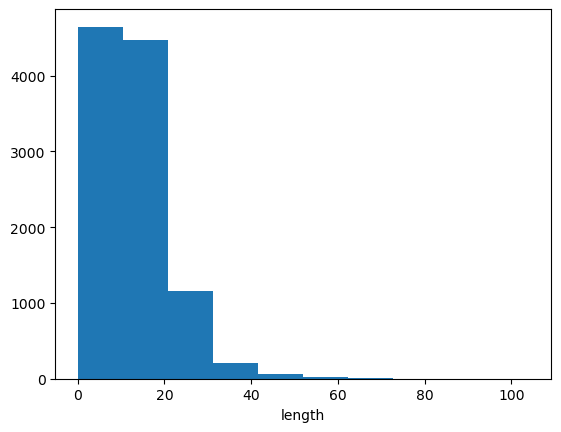

In [126]:
length=checkLength(seq_train)

In [127]:
pad_length = 30

In [128]:
train_seq = pad_sequences(seq_train, maxlen=pad_length)
test_seq = pad_sequences(seq_test, maxlen=pad_length)
val_seq = pad_sequences(seq_val, maxlen=pad_length)

In [129]:
train_seq.shape, test_seq.shape, val_seq.shape

((10566, 30), (3302, 30), (2642, 30))

[5] 모델 구성

방법 1. 심플RNN

---

In [133]:
model = Sequential()
model.add(Embedding(num_words, 32, input_length=pad_length))
model.add(Dropout(0.3))
model.add(SimpleRNN(32))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 30, 32)            236800    
                                                                 
 dropout_24 (Dropout)        (None, 30, 32)            0         
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 32)                2080      
                                                                 
 dropout_25 (Dropout)        (None, 32)                0         
                                                                 
 dense_12 (Dense)            (None, 4)                 132       
                                                                 
Total params: 239,012
Trainable params: 239,012
Non-trainable params: 0
_________________________________________________________________


In [134]:
model.compile(optimizer='rmsprop', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [135]:
hist = model.fit(train_seq, y_train, 
                epochs=3, 
                batch_size=32, 
                validation_data=(val_seq, y_val))

Epoch 1/3
331/331 [==============================] - 8s 17ms/step - loss: 0.6341 - accuracy: 0.8117 - val_loss: 0.5680 - val_accuracy: 0.8221
Epoch 2/3
331/331 [==============================] - 5s 14ms/step - loss: 0.5606 - accuracy: 0.8216 - val_loss: 0.5526 - val_accuracy: 0.8255
Epoch 3/3
331/331 [==============================] - 4s 11ms/step - loss: 0.4786 - accuracy: 0.8377 - val_loss: 0.5422 - val_accuracy: 0.8213


In [136]:
model.evaluate(test_seq, y_test)

104/104 [==============================] - 0s 4ms/step - loss: 0.5239 - accuracy: 0.8322


[0.523883044719696, 0.8322228789329529]

- 데이콘 test.csv로 예측 - 타겟 1. 유형

In [137]:
test = pd.read_csv('./open/test.csv')['문장']
sub = pd.read_csv('./open/sample_submission.csv')

In [138]:
test_list = makeTagging(test)

In [139]:
# 분리한 단어들로 문장 다시 생성하는 함수
def makeData(data):
    total_list = []
    for stc in data:
        sentence = ''
        for word in stc:
            sentence=sentence+' '+word
        total_list.append(sentence.strip())
    return total_list

In [140]:
total_test = makeData(test_list)
test_data = total_test
# 데이터 확인
for i in range(5):
    print(test_data[i])

장욱진 가족 허물 없다 가족 처음 공개 되다 정약용 정효 자전 정부 인전 강진 사람 주의 부탁 받다 일찍 죽다 아들 홀로 남다 며느리 안타깝다 사연 쓸다 서예 작품
조지 부시 버락 오바마 대통령 전쟁 위험 때문 버리다 카드
지난해 영업 이익 올해 급증 하다
수상 작가 맺다 계약서 내용 가운데 일부 독소 조항 해석 돼다 수정 요청 받다 문학 사상사 수용 하다 않다 우수상 뽑히다 후보 올해 수상 작품집 작품 수록 거부 하다
최근 산업 은행 대규모 손실 위기 닥치다 에어부산 금융 지원 결정 하다 에어부산 부채 비율 지난해 급등 하다


In [141]:
seq_title=myToken.texts_to_sequences(test_data)
title_seq = pad_sequences(seq_title, maxlen=pad_length)

In [142]:
t = []
for i in range(len(title_seq)):
    t.append(model.predict([title_seq[[i]]]))

1/1 [==============================] - 0s 29ms/step


In [143]:
topic = []
for i in range(len(t)):
    topic.append(np.argmax(t[i]))

In [158]:
# new_target1 = target1.map({'사실형':0, '추론형':1, '예측형':2, '대화형':3})
label1 = pd.DataFrame(topic)
label1 = label1.iloc[:,0].map({0:'사실형', 1:'추론형', 2:'예측형', 3:'대화형'})

-> 타겟 2. 극성

In [160]:
target2.unique()

array(['긍정', '부정', '미정'], dtype=object)

In [161]:
new_target2 = target2.map({'긍정':0, '부정':1, '미정':2})

In [162]:
# 비율에 맞게 학습/테스트 데이터 분활
X_train, X_test, y_train, y_test = train_test_split(np.array(data), 
                                                    new_target2, 
                                                    test_size=0.2,
                                                    stratify=new_target2,
                                                    random_state=42)

In [163]:
# 비율에 맞게 학습/검증 데이터 분활
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  test_size=0.2,
                                                  random_state=42)

In [164]:
# 단어사전 생성하는 함수
def makeVoca(numWord=0):
    if numWord>0:
        myToken=Tokenizer(num_words=numWord)
    else:
        myToken=Tokenizer()
    
    # 단어사전(voca) 생성
    myToken.fit_on_texts(X_train)   
    return myToken

In [165]:
# 텍스트 데이터 토큰화 진행
myToken=makeVoca()
print('word index: {}'.format(len(myToken.word_index)))

word index: 17808


In [166]:
num_words = 7400
word_counts = dict(myToken.word_counts.items())
counts = list(word_counts.values())

print('전체 토큰 수 :', len(counts))
print('전체 토큰 빈도 수 :',np.sum(counts))
print(num_words,'위까지 등장 토큰 빈도수 :', np.sum(counts[:num_words]))
print('비율 :',np.sum(counts[:num_words])/np.sum(counts) *100 )

전체 토큰 수 : 17808
전체 토큰 빈도 수 : 149960
7400 위까지 등장 토큰 빈도수 : 128687
비율 : 85.81421712456655


In [167]:
myToken=makeVoca(num_words)
print('word index: {}'.format(len(myToken.word_index)))

word index: 17808


In [168]:
seq_train=myToken.texts_to_sequences(X_train)
seq_test=myToken.texts_to_sequences(X_test)
seq_val=myToken.texts_to_sequences(X_val)

In [169]:
# 패딩 길이 설정 
def checkLength(datas):
    length = []
    for data in datas:
        length.append(len(data))
    plt.hist(length)
    plt.xlabel('length')
    plt.show()
    return length

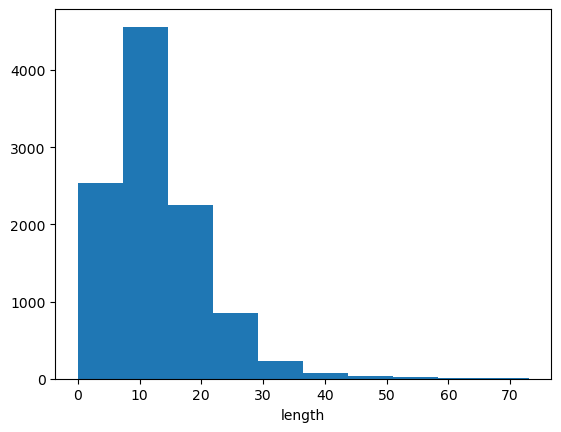

In [170]:
length = checkLength(seq_train)
pad_length = 30
train_seq = pad_sequences(seq_train, maxlen=pad_length)
test_seq = pad_sequences(seq_test, maxlen=pad_length)
val_seq = pad_sequences(seq_val, maxlen=pad_length)

In [172]:
model2 = Sequential()
model2.add(Embedding(num_words, 32, input_length=pad_length))
model2.add(Dropout(0.3))
model2.add(SimpleRNN(32))
model2.add(Dropout(0.3))
model2.add(Dense(3, activation='softmax'))

In [173]:
model2.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
hist2 = model2.fit(train_seq, y_train, 
                epochs=3, 
                batch_size=32, 
                validation_data=(val_seq, y_val))

Epoch 1/3
331/331 [==============================] - 7s 14ms/step - loss: 0.2275 - accuracy: 0.9515 - val_loss: 0.1613 - val_accuracy: 0.9603
Epoch 2/3
331/331 [==============================] - 4s 12ms/step - loss: 0.1336 - accuracy: 0.9678 - val_loss: 0.1472 - val_accuracy: 0.9663
Epoch 3/3
331/331 [==============================] - 4s 12ms/step - loss: 0.0762 - accuracy: 0.9778 - val_loss: 0.1710 - val_accuracy: 0.9633


In [174]:
model2.evaluate(test_seq, y_test)

104/104 [==============================] - 0s 4ms/step - loss: 0.1658 - accuracy: 0.9588


[0.16581405699253082, 0.9588128328323364]

In [175]:
t = []
for i in range(len(title_seq)):
    t.append(model2.predict([title_seq[[i]]]))

1/1 [==============================] - 0s 43ms/step


In [176]:
topic = []
for i in range(len(t)):
    topic.append(np.argmax(t[i]))

In [177]:
# new_target2 = target2.map({'긍정':0, '부정':1, '미정':2})
label2 = pd.DataFrame(topic)
label2 = label2.iloc[:,0].map({0:'긍정', 1:'부정', 2:'미정'})

-> 타겟 3. 시제

In [181]:
target3.unique()

array(['현재', '과거', '미래'], dtype=object)

In [182]:
new_target3 = target3.map({'현재':0, '과거':1, '미래':2})

In [183]:
# 비율에 맞게 학습/테스트 데이터 분활
X_train, X_test, y_train, y_test = train_test_split(np.array(data), 
                                                    new_target3, 
                                                    test_size=0.2,
                                                    stratify=new_target3,
                                                    random_state=42)
                                                    
# 비율에 맞게 학습/검증 데이터 분활
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  test_size=0.2,
                                                  random_state=42)

In [184]:
# 단어사전 생성하는 함수
def makeVoca(numWord=0):
    if numWord>0:
        myToken=Tokenizer(num_words=numWord)
    else:
        myToken=Tokenizer()
    
    # 단어사전(voca) 생성
    myToken.fit_on_texts(X_train)   
    return myToken

# 텍스트 데이터 토큰화 진행
myToken=makeVoca()
print('word index: {}'.format(len(myToken.word_index)))

word index: 17952


In [185]:
num_words = 7400
word_counts = dict(myToken.word_counts.items())
counts = list(word_counts.values())

print('전체 토큰 수 :', len(counts))
print('전체 토큰 빈도 수 :',np.sum(counts))
print(num_words,'위까지 등장 토큰 빈도수 :', np.sum(counts[:num_words]))
print('비율 :',np.sum(counts[:num_words])/np.sum(counts) *100 )

전체 토큰 수 : 17952
전체 토큰 빈도 수 : 150632
7400 위까지 등장 토큰 빈도수 : 128648
비율 : 85.40549152902437


In [186]:
myToken=makeVoca(num_words)
print('word index: {}'.format(len(myToken.word_index)))

word index: 17952


In [187]:
seq_train=myToken.texts_to_sequences(X_train)
seq_test=myToken.texts_to_sequences(X_test)
seq_val=myToken.texts_to_sequences(X_val)

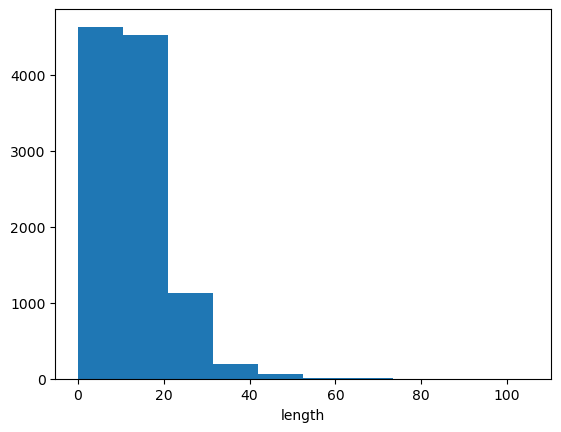

In [188]:
# 패딩 길이 설정 
def checkLength(datas):
    length = []
    for data in datas:
        length.append(len(data))
    plt.hist(length)
    plt.xlabel('length')
    plt.show()
    return length

length = checkLength(seq_train)
pad_length = 30
train_seq = pad_sequences(seq_train, maxlen=pad_length)
test_seq = pad_sequences(seq_test, maxlen=pad_length)
val_seq = pad_sequences(seq_val, maxlen=pad_length)

In [189]:
model3 = Sequential()
model3.add(Embedding(num_words, 32, input_length=pad_length))
model3.add(Dropout(0.3))
model3.add(SimpleRNN(32))
model3.add(Dropout(0.3))
model3.add(Dense(3, activation='softmax'))

In [190]:
model3.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
hist3 = model3.fit(train_seq, y_train, 
                epochs=3, 
                batch_size=32, 
                validation_data=(val_seq, y_val))

Epoch 1/3
331/331 [==============================] - 7s 15ms/step - loss: 0.8594 - accuracy: 0.5933 - val_loss: 0.7170 - val_accuracy: 0.7063
Epoch 2/3
331/331 [==============================] - 4s 13ms/step - loss: 0.6077 - accuracy: 0.7597 - val_loss: 0.6797 - val_accuracy: 0.7195
Epoch 3/3
331/331 [==============================] - 4s 13ms/step - loss: 0.3332 - accuracy: 0.8832 - val_loss: 0.7897 - val_accuracy: 0.6874


In [191]:
model3.evaluate(test_seq, y_test)

104/104 [==============================] - 1s 5ms/step - loss: 0.7859 - accuracy: 0.6972


[0.7859445214271545, 0.6971532702445984]

In [192]:
t = []
for i in range(len(title_seq)):
    t.append(model3.predict([title_seq[[i]]]))

1/1 [==============================] - 0s 29ms/step


In [193]:
topic = []
for i in range(len(t)):
    topic.append(np.argmax(t[i]))

In [194]:
# new_target3 = target3.map({'현재':0, '과거':1, '미래':2})
label3 = pd.DataFrame(topic)
label3 = label3.iloc[:,0].map({0:'현재', 1:'과거', 2:'미래'})

-> 타겟 4. 확실성

In [196]:
target4.unique()

array(['확실', '불확실'], dtype=object)

In [197]:
new_target4 = target4.map({'확실':0, '불확실':1})

In [198]:
# 비율에 맞게 학습/테스트 데이터 분활
X_train, X_test, y_train, y_test = train_test_split(np.array(data), 
                                                    new_target4, 
                                                    test_size=0.2,
                                                    stratify=new_target4,
                                                    random_state=42)
                                                    
# 비율에 맞게 학습/검증 데이터 분활
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  test_size=0.2,
                                                  random_state=42)

In [199]:
# 단어사전 생성하는 함수
def makeVoca(numWord=0):
    if numWord>0:
        myToken=Tokenizer(num_words=numWord)
    else:
        myToken=Tokenizer()
    
    # 단어사전(voca) 생성
    myToken.fit_on_texts(X_train)   
    return myToken

# 텍스트 데이터 토큰화 진행
myToken=makeVoca()
print('word index: {}'.format(len(myToken.word_index)))

word index: 17911


In [200]:
num_words = 7400
word_counts = dict(myToken.word_counts.items())
counts = list(word_counts.values())

print('전체 토큰 수 :', len(counts))
print('전체 토큰 빈도 수 :',np.sum(counts))
print(num_words,'위까지 등장 토큰 빈도수 :', np.sum(counts[:num_words]))
print('비율 :',np.sum(counts[:num_words])/np.sum(counts) *100 )

전체 토큰 수 : 17911
전체 토큰 빈도 수 : 150318
7400 위까지 등장 토큰 빈도수 : 128922
비율 : 85.7661757075001


In [201]:
myToken=makeVoca(num_words)
print('word index: {}'.format(len(myToken.word_index)))

word index: 17911


In [202]:
seq_train=myToken.texts_to_sequences(X_train)
seq_test=myToken.texts_to_sequences(X_test)
seq_val=myToken.texts_to_sequences(X_val)

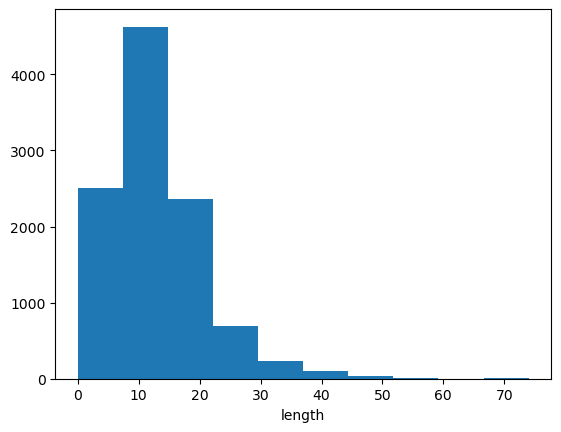

In [203]:
# 패딩 길이 설정 
def checkLength(datas):
    length = []
    for data in datas:
        length.append(len(data))
    plt.hist(length)
    plt.xlabel('length')
    plt.show()
    return length

length = checkLength(seq_train)
pad_length = 30
train_seq = pad_sequences(seq_train, maxlen=pad_length)
test_seq = pad_sequences(seq_test, maxlen=pad_length)
val_seq = pad_sequences(seq_val, maxlen=pad_length)

In [204]:
model4 = Sequential()
model4.add(Embedding(num_words, 32, input_length=pad_length))
model4.add(Dropout(0.3))
model4.add(SimpleRNN(32))
model4.add(Dropout(0.3))
model4.add(Dense(2, activation='softmax'))

In [205]:
model4.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
hist4 = model4.fit(train_seq, y_train, 
                epochs=3, 
                batch_size=32, 
                validation_data=(val_seq, y_val))

Epoch 1/3
331/331 [==============================] - 8s 16ms/step - loss: 0.2896 - accuracy: 0.9116 - val_loss: 0.2460 - val_accuracy: 0.9205
Epoch 2/3
331/331 [==============================] - 5s 15ms/step - loss: 0.2092 - accuracy: 0.9283 - val_loss: 0.2401 - val_accuracy: 0.9243
Epoch 3/3
331/331 [==============================] - 5s 16ms/step - loss: 0.0811 - accuracy: 0.9725 - val_loss: 0.3225 - val_accuracy: 0.8997


In [206]:
model4.evaluate(test_seq, y_test)

104/104 [==============================] - 1s 5ms/step - loss: 0.3221 - accuracy: 0.9001


[0.3220870792865753, 0.9000605940818787]

In [207]:
t = []
for i in range(len(title_seq)):
    t.append(model4.predict([title_seq[[i]]]))

1/1 [==============================] - 0s 30ms/step


In [208]:
topic = []
for i in range(len(t)):
    topic.append(np.argmax(t[i]))

In [209]:
# new_target4 = target4.map({'확실':0, '불확실':1})
label4 = pd.DataFrame(topic)
label4 = label4.iloc[:,0].map({0:'확실', 1:'불확실'})

In [211]:
label1.shape, label2.shape, label3.shape, label4.shape

((7090,), (7090,), (7090,), (7090,))

In [212]:
label = []
for i in range(len(label1)):
    label.append(label1[i]+'-'+label2[i]+'-'+label3[i]+'-'+label4[i])

In [215]:
sub.label = label